Введите интервал неопределённости (через пробел)
Введите h > 0 
Для h = 0.1:


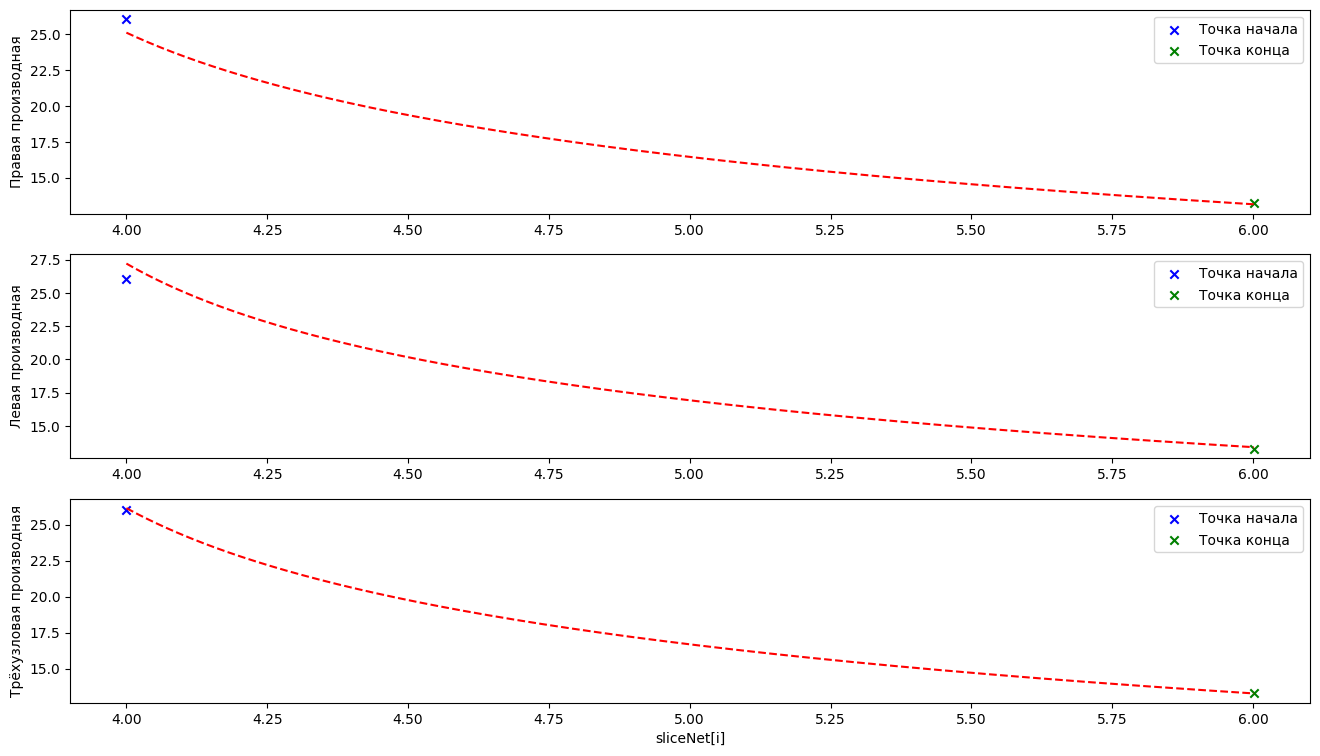

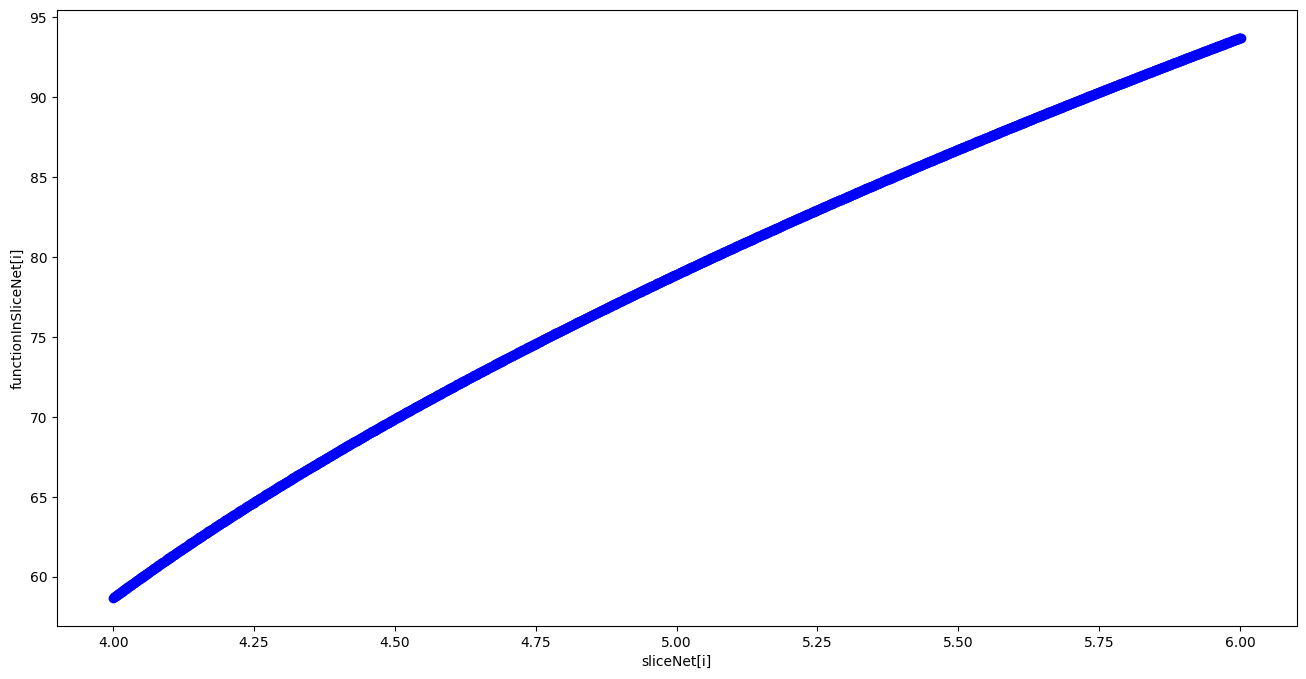

0.1931845953660282 0.2319761244943878 0.01982134635131011


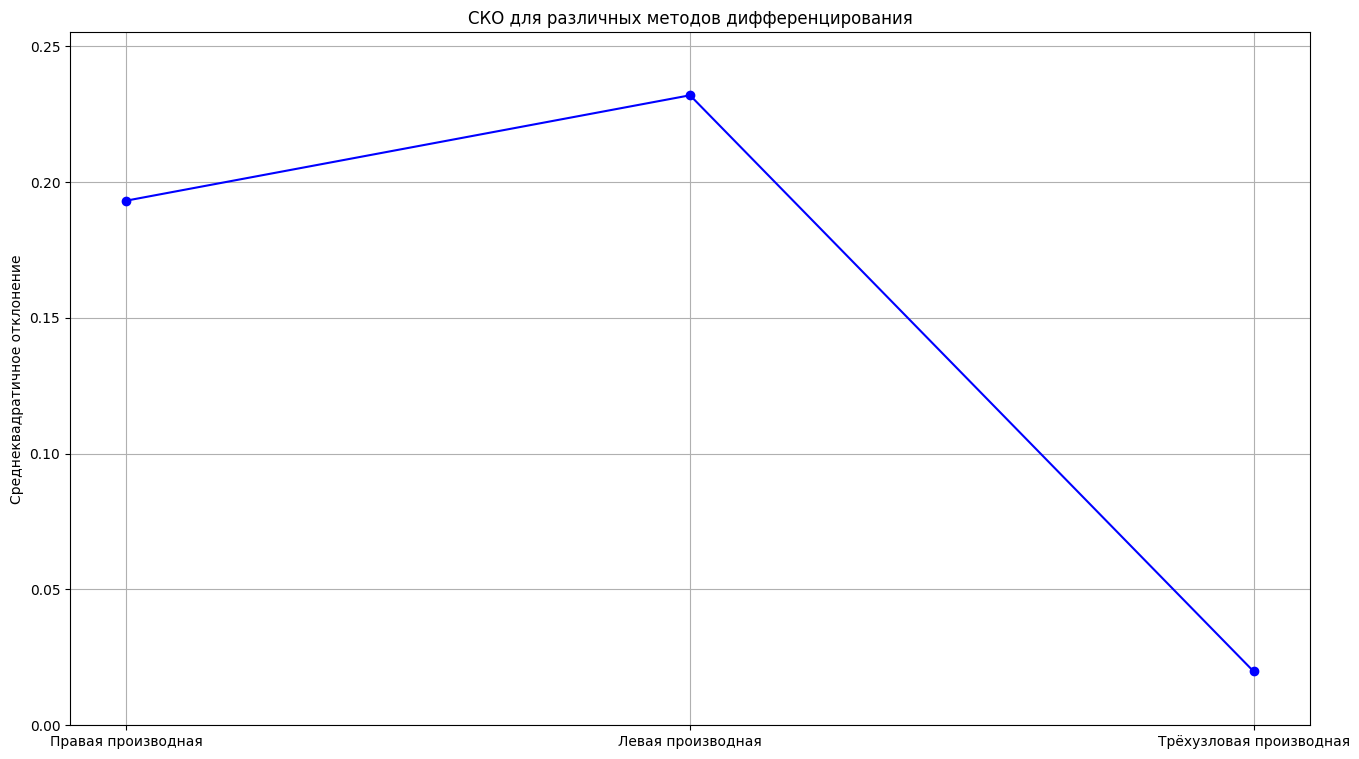

Для h / 2:


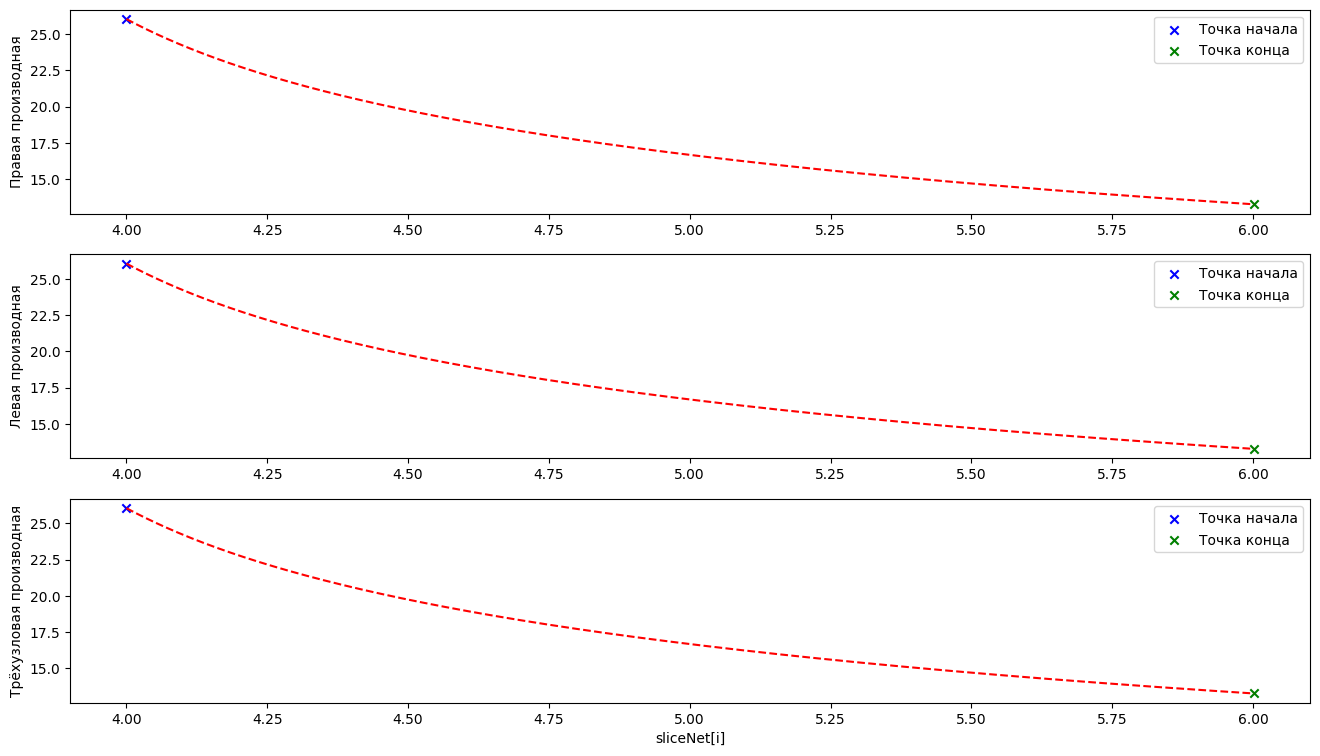

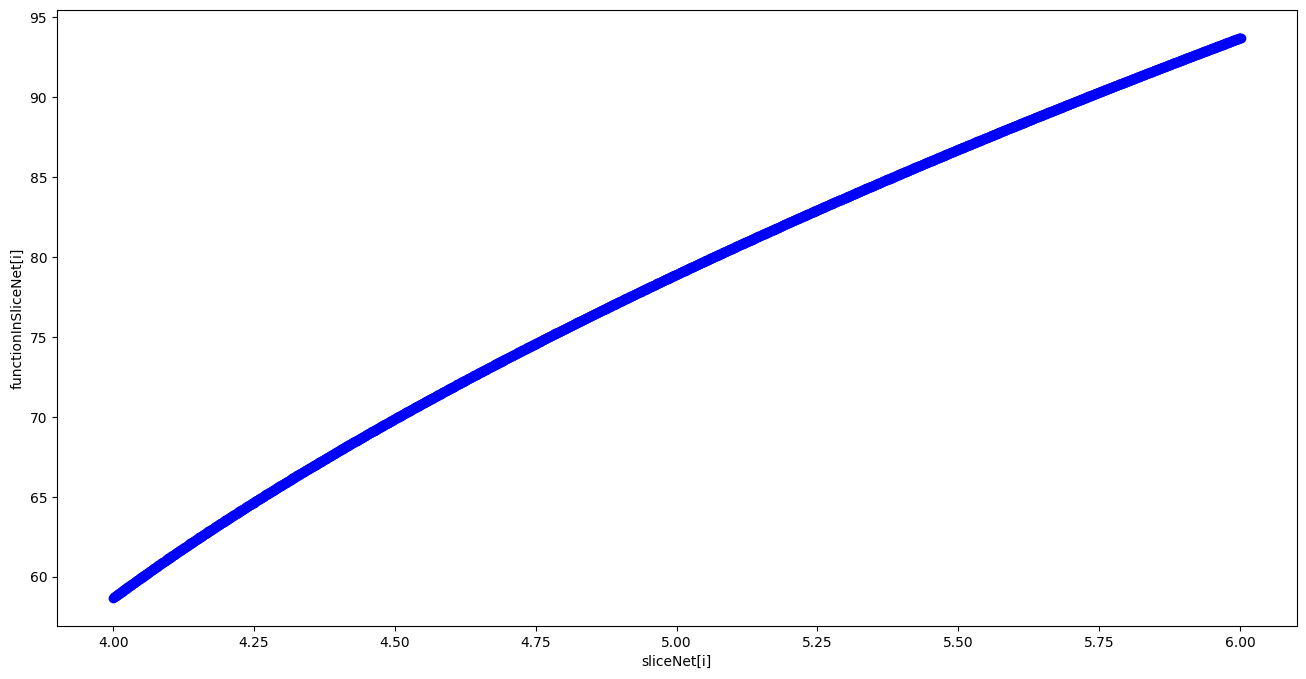

0.0010514870297957451 0.0010524428022609706 4.8826045551017e-07


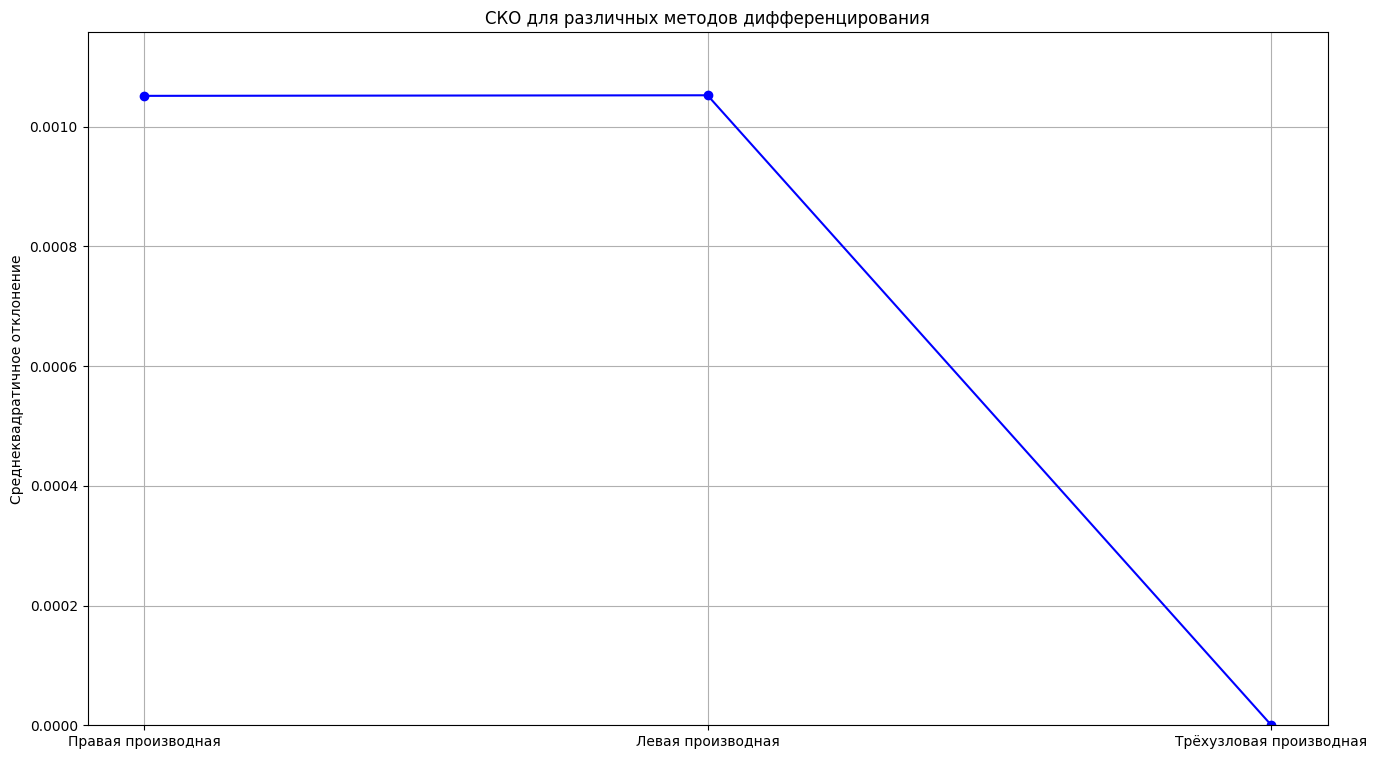

Для h / 4:


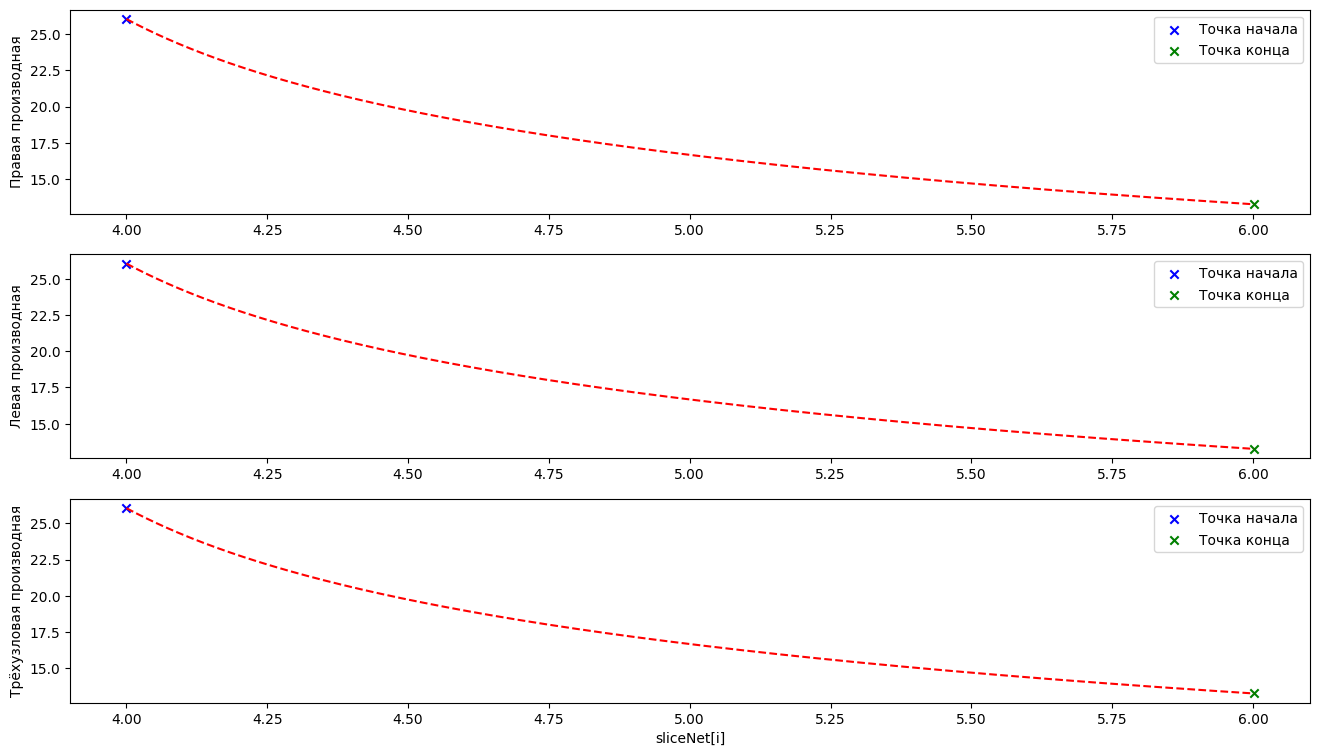

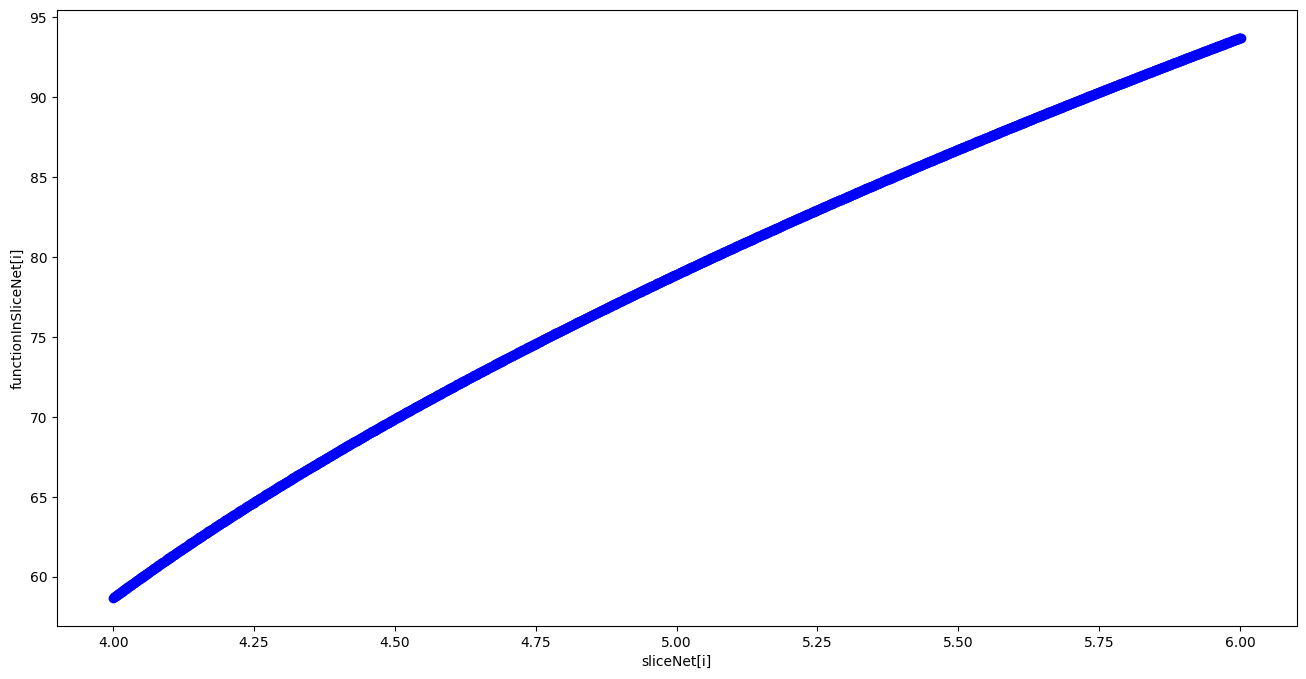

0.000525862880954491 0.0005261018331276023 1.220692703081537e-07


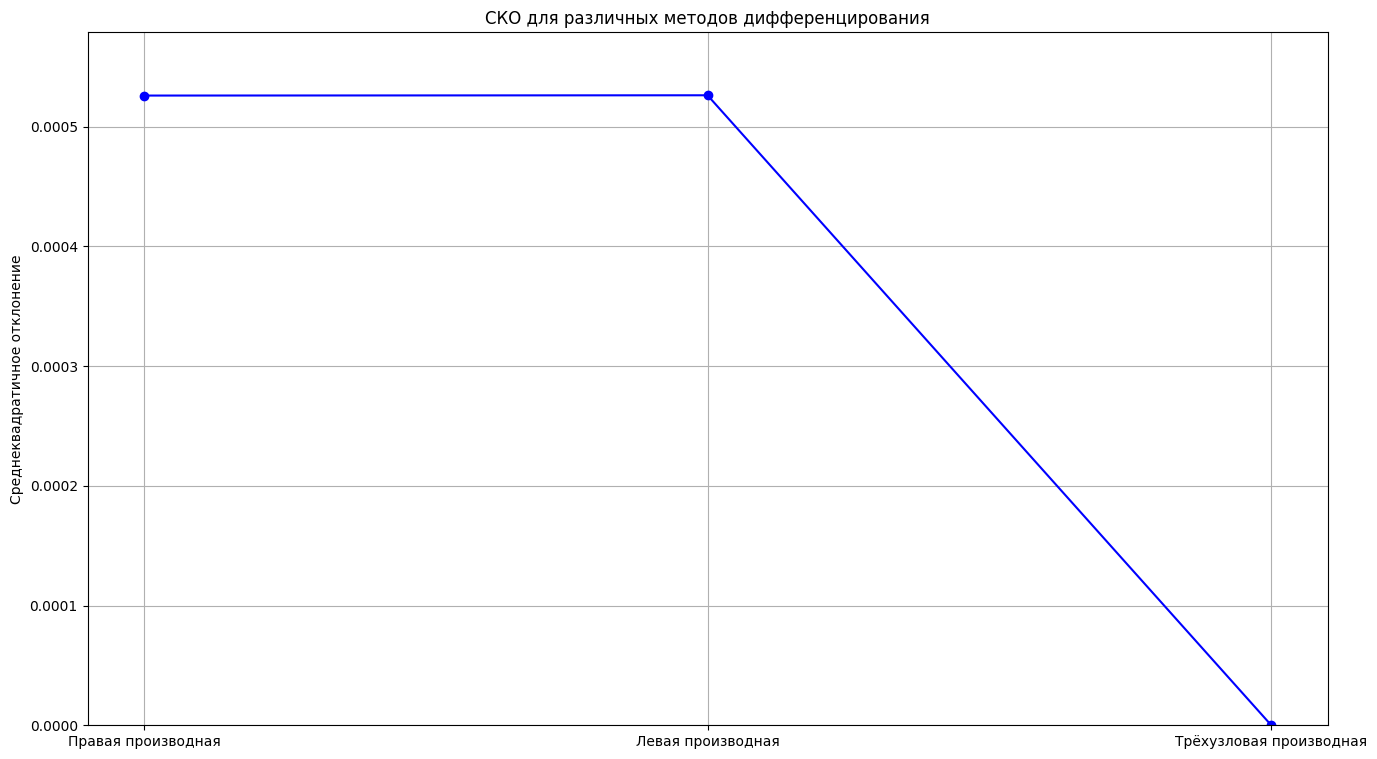

Для h / 8:


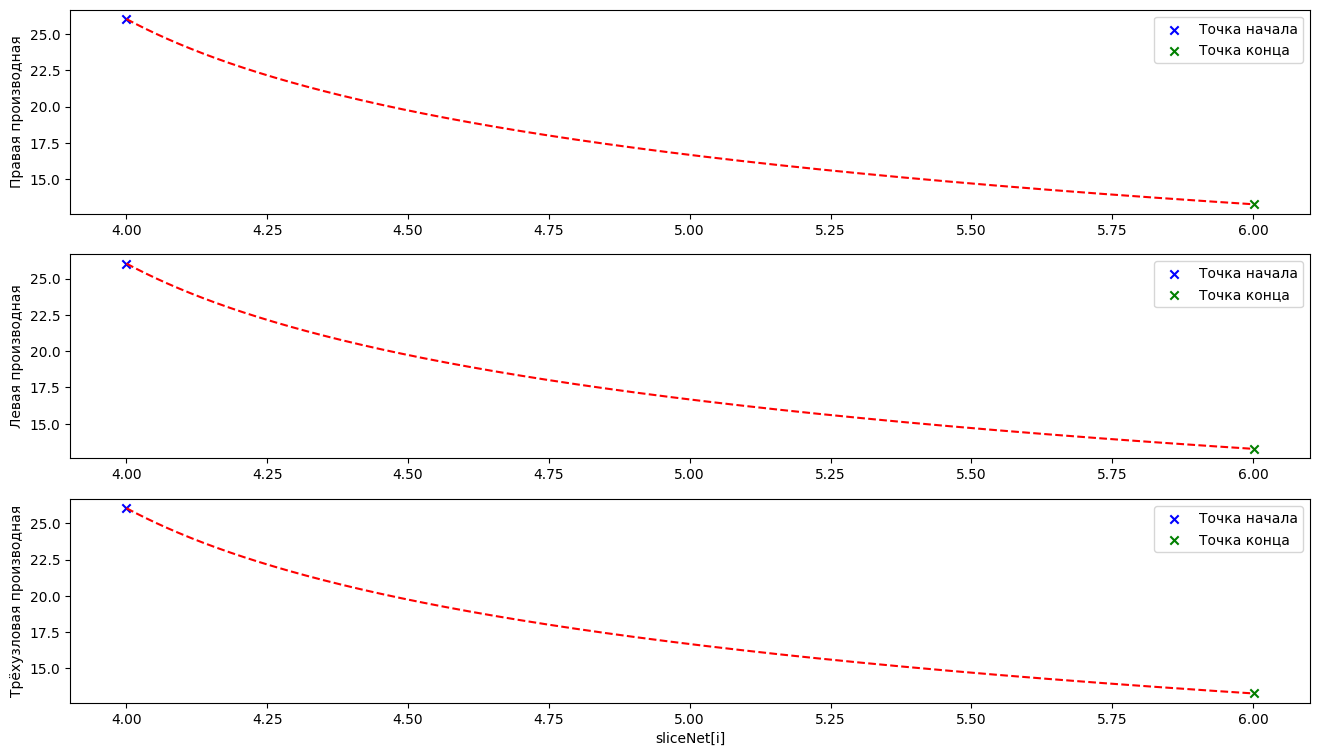

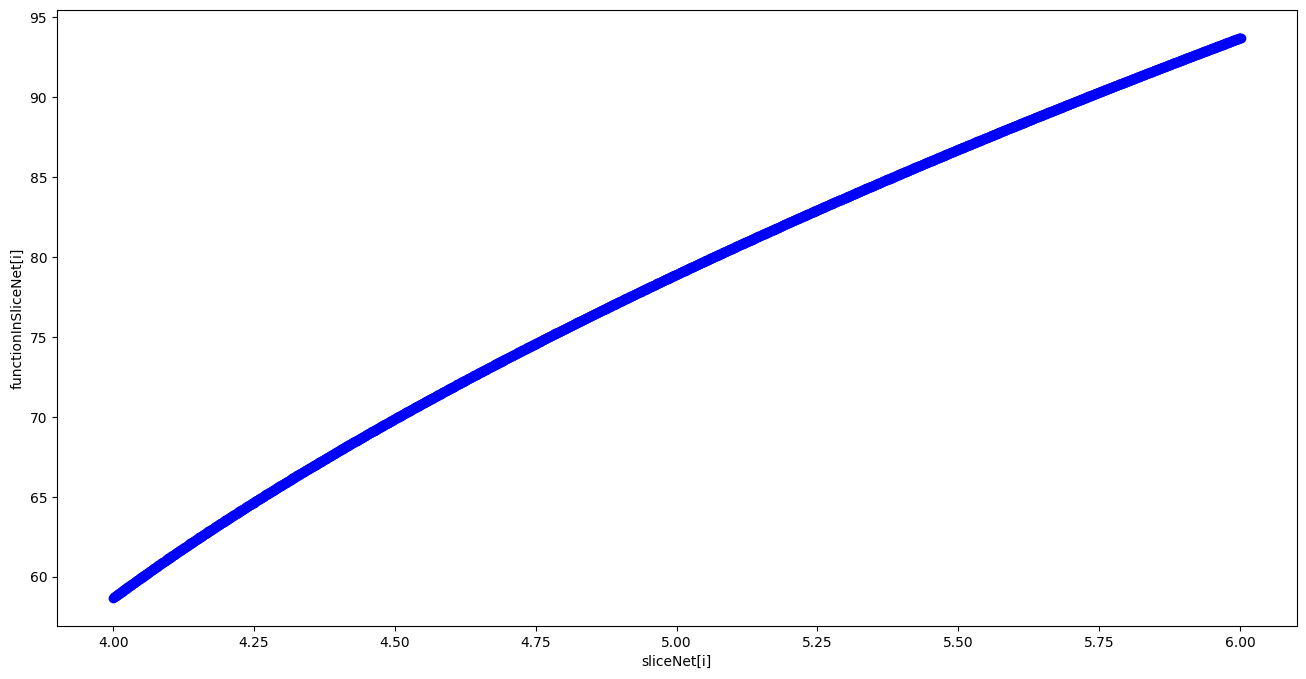

0.0002629613044323596 0.0002630210264125441 3.051007062321969e-08


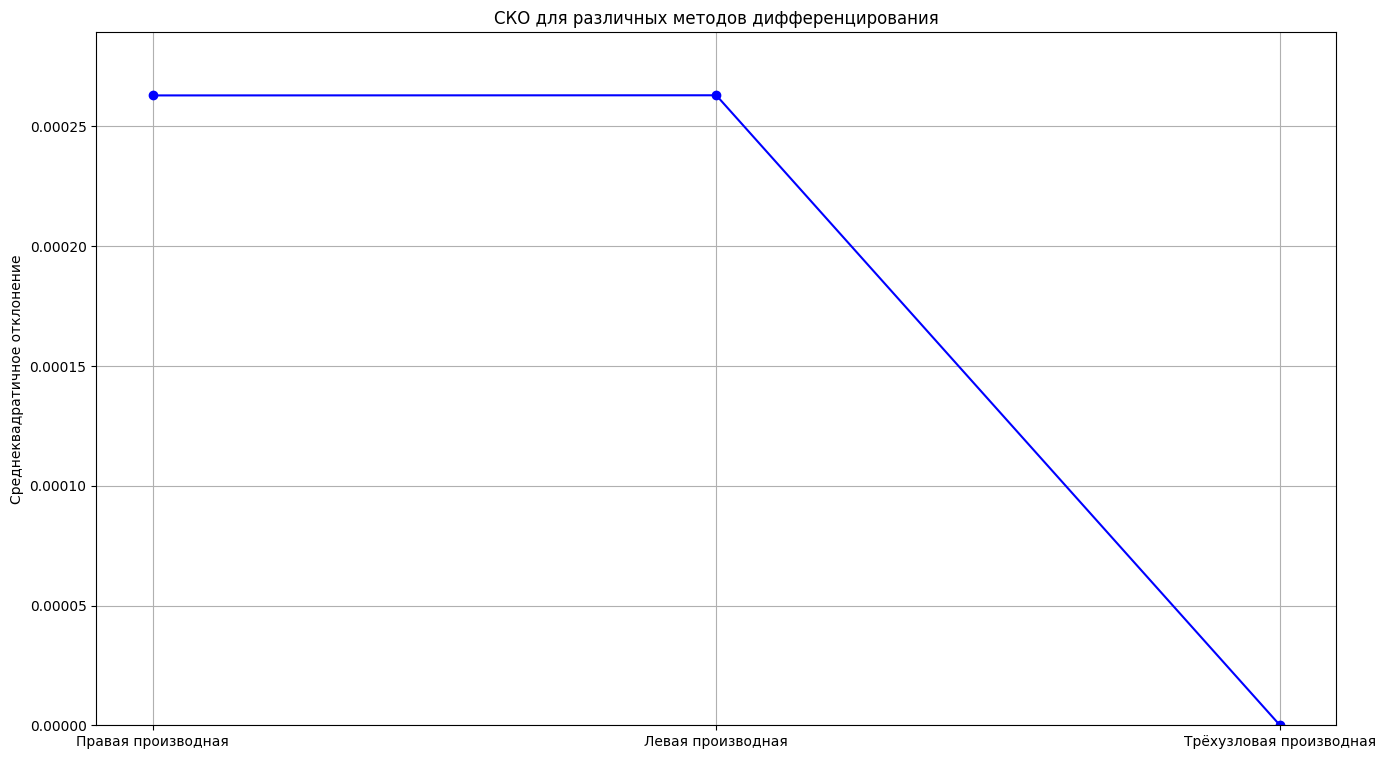

Для h / 16:


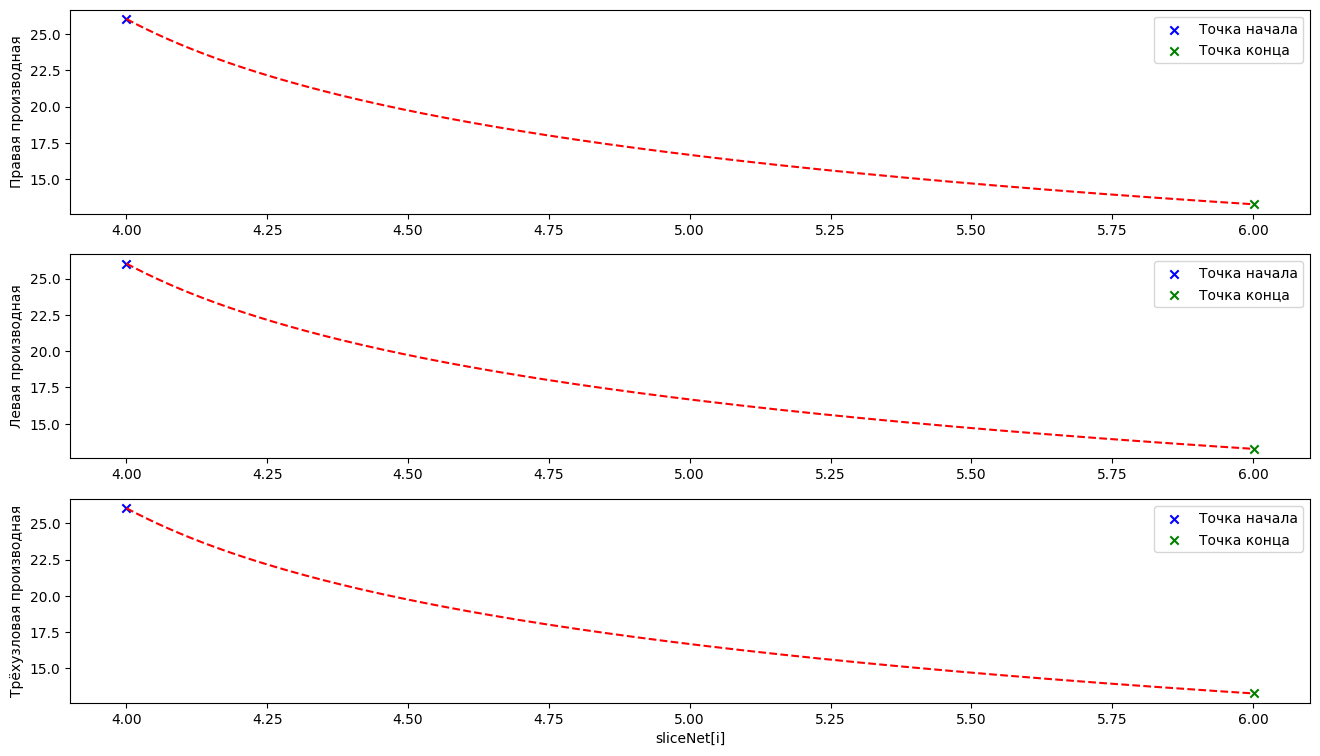

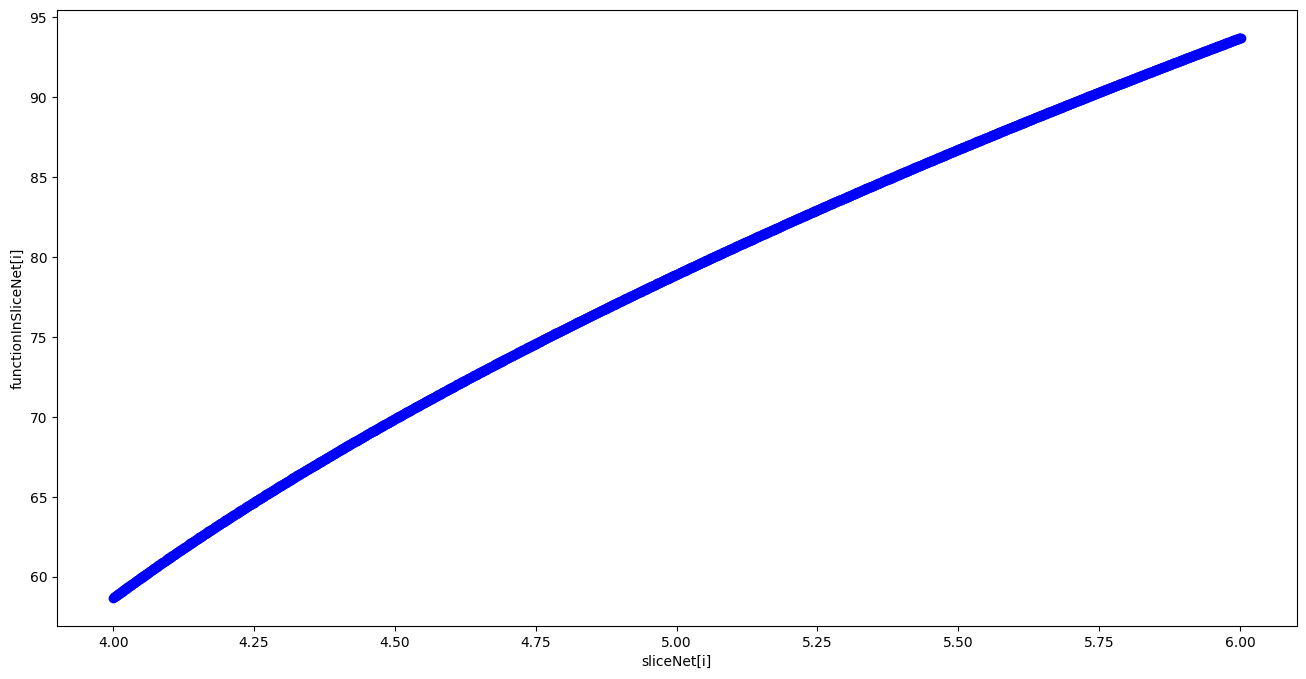

0.00013148809942673743 0.0001315030614176319 7.642309789444599e-09


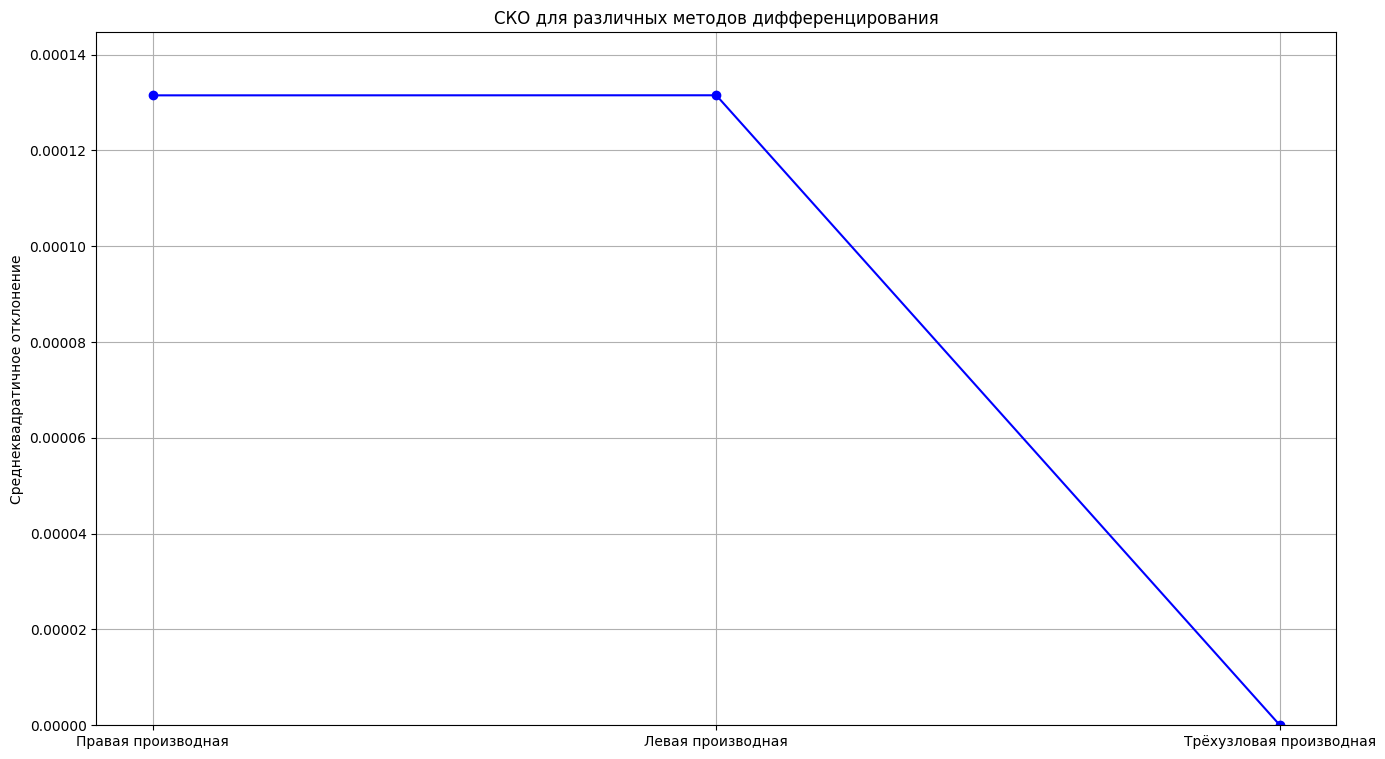

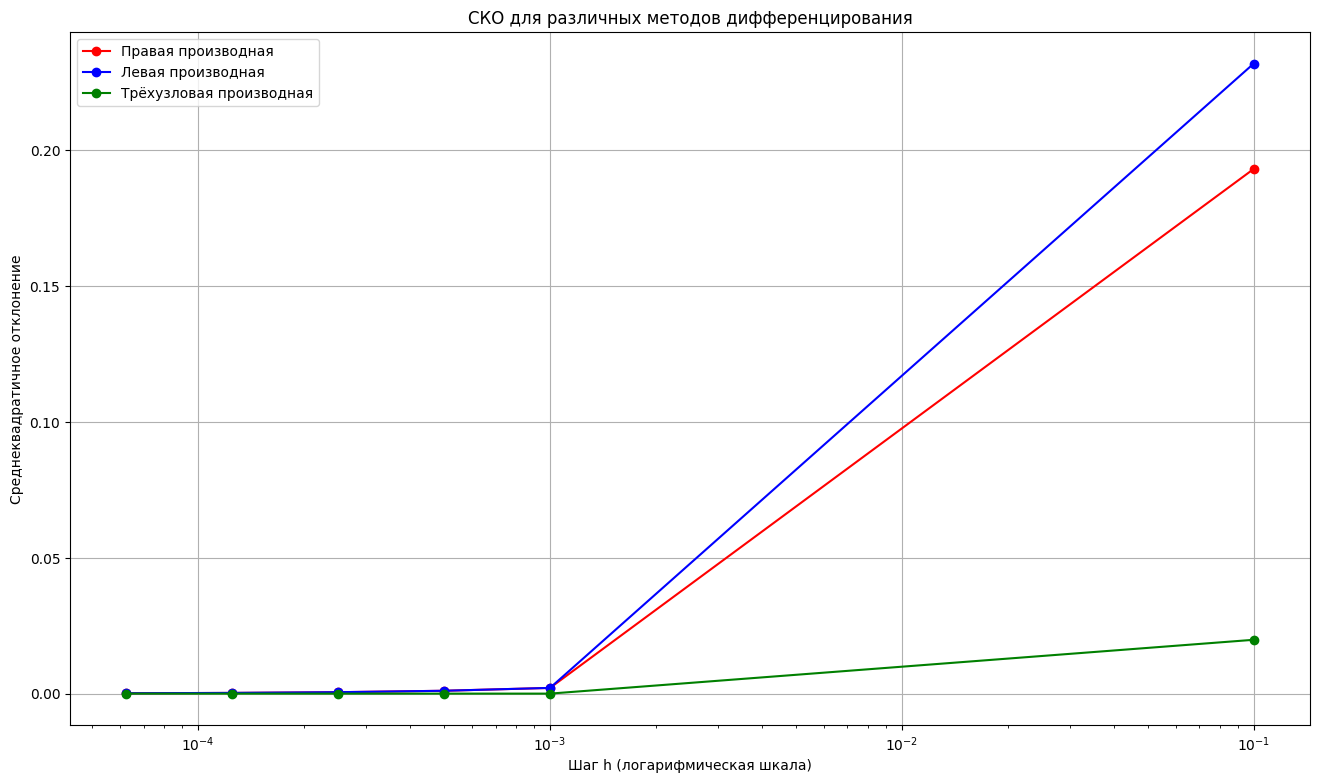

In [1]:
#@title Задание № 2

import numpy as np
import matplotlib.pyplot as plt

print("Введите номер функции, где:")
print("1 - 5 * np.sqrt(25 * x -88) - 3 + 32 * np.log(x)")
print("2 - 14 * np.power(x, 2) * sin(cos(x))")
number = int(input())

#Это механизм для выбора функции
if number == 1:
    def function(x):
        return 5 * np.sqrt(25 * x - 88) - 3 + 32 * np.log(x)  # Функция


    def derivative(x):
        return (125 / (2 * np.sqrt(25 * x - 88))) + (32 / x)  # Производная (считал сам, нужна для дальнейших сравнений)
elif number == 2:
    def function(x):
        return 14 * np.power(x, 2) * np.sin(np.cos(x))

    def derivative(x):
        return 28 * x * np.sin(np.cos(x)) - 14 * np.power(x, 2) * np.cos(np.cos(x)) * np.sin(x)

print("Введите интервал неопределённости (через пробел)")
a, b = map(float, input().split()) # Ввод границ отрезка
print("Введите h > 0 ")
h = float(input() or 0.1) # Тут и далее сделано так, чтобы ничего не того не ввели в h

# def function(x):
#     return 5 * np.sqrt(25 * x -88) - 3 + 32 * np.log(x)  # Функция
#
# def derivative(x):
#     return (125 / (2 * np.sqrt(25 * x -88))) + (32 / x) # Производная (считал сам, нужна для дальнейших сравнений)

def rightDerivative(x, h):
    return (function(x + h) - function(x)) / h # Правая разностная производная

def leftDerivative(x, h):
    return (function(x) - function(x - h)) / h # Левая разностная производная

def threePointDerivative(x, h):
    return (function(x + h) - function(x - h)) / (2 * h) # Трёхузловая производная


# Защита от отрицательных значений h
if h <= 0:
    raise ValueError("h должен быть положительным числом")

sliceNet = np.arange(a, b + h, h) # Построение сетки разбиения

functionInSliceNet = [] # Значения функции в узлах

derivativeInSliceNet = [] # Значение производной в узлах

for i in range(0, len(sliceNet)):
    functionInSliceNet.append(function(sliceNet[i])) # Тут мы заполняем значениями функции

for i in range(0, len(sliceNet)):
    derivativeInSliceNet.append(derivative(sliceNet[i])) # А тут значениями производной

def startDerivative(x, h):
    return ((-3 * functionInSliceNet[0]) + (4 * functionInSliceNet[1]) - (functionInSliceNet[2])) / (2 * h) # Тут всё по формулам из методички

def endDerivative(x, h):
    nCount = len(sliceNet) - 1
    return ((functionInSliceNet[nCount - 2]) - (4 * functionInSliceNet[nCount - 1]) + (3 * functionInSliceNet[nCount])) / (2 * h) # Тут тоже

def stdForCurrentH(h):

    # Численные производные
    rightDerivativeValues = np.array([rightDerivative(i, h) for i in sliceNet])  # Расчёт для проверки
    leftDerivativeValues = np.array([leftDerivative(i, h) for i in sliceNet])  # Расчёт для проверки
    threePointDerivativeValues = np.array([threePointDerivative(i, h) for i in sliceNet])  # Расчёт для проверки

    # Вычисление среднеквадратичного отклонения
    stdRight = np.std(rightDerivativeValues - derivativeInSliceNet) # Ну тут считаю отклонение
    stdLeft = np.std(leftDerivativeValues - derivativeInSliceNet) # Ну тут считаю отклонение
    stdThreePoint = np.std(threePointDerivativeValues - derivativeInSliceNet) # Ну тут считаю отклонение

    print(stdRight, stdLeft, stdThreePoint) # На всякий случай его вывожу

    # Построение графика СКО
    methods = ["Правая производная", "Левая производная", "Трёхузловая производная"]
    std_values = [stdRight, stdLeft, stdThreePoint]

    plt.figure(figsize=(16, 9))
    plt.plot(methods, std_values, marker="o", linestyle="-", color="b")
    plt.ylabel("Среднеквадратичное отклонение")
    plt.title("СКО для различных методов дифференцирования")
    plt.ylim(0, max(std_values) * 1.1)  # Увеличиваем пределы Y для лучшего отображения и восприятия графика
    plt.grid()
    plt.show()

def plotAllStd(h_values, a, b):
    stdValuesRight = [] # Создаём массивы, по которым потом будем строить график
    stdValuesLeft = [] # Создаём массивы, по которым потом будем строить график
    stdValuesThreePoint = [] # Создаём массивы, по которым потом будем строить график

    for h in h_values:
        rightDerivativeValues = np.array([rightDerivative(x, h) for x in sliceNet]) # Заполняем для данного типа производной её же массив
        leftDerivativeValues = np.array([leftDerivative(x, h) for x in sliceNet]) # Заполняем для данного типа производной её же массив
        threePointDerivativeValues = np.array([threePointDerivative(x, h) for x in sliceNet]) # Заполняем для данного типа её производной же массив

        stdRight = np.std(rightDerivativeValues - derivativeInSliceNet) # Считаем отклонение
        stdLeft = np.std(leftDerivativeValues - derivativeInSliceNet) # Считаем отклонение
        stdThreePoint = np.std(threePointDerivativeValues - derivativeInSliceNet) # Считаем отклонение

        stdValuesRight.append(stdRight) # Добавляем полученную точку в массив
        stdValuesLeft.append(stdLeft) # Добавляем полученную точку в массив
        stdValuesThreePoint.append(stdThreePoint) # Добавляем полученную точку в массив

    # Построение графика СКО
    plt.figure(figsize=(16, 9))
    plt.plot(h_values, stdValuesRight, marker="o", linestyle="-", color="red", label="Правая производная") # Графики в одной системе координат на одной фигуре
    plt.plot(h_values, stdValuesLeft, marker="o", linestyle="-", color="blue", label="Левая производная") # Графики в одной системе координат на одной фигуре
    plt.plot(h_values, stdValuesThreePoint, marker="o", linestyle="-", color="green", label="Трёхузловая производная") # Графики в одной системе координат на одной фигуре
    plt.xscale("log")  # Логарифмическая шкала для оси X так как фаг у нам маленький и так будет красивее :)
    plt.xlabel("Шаг h (логарифмическая шкала)")
    plt.ylabel("Среднеквадратичное отклонение")
    plt.title("СКО для различных методов дифференцирования")
    plt.legend()
    plt.grid()
    plt.show()

def all(h):
    start_derivative_value = startDerivative(sliceNet[0], h)
    end_derivative_value = endDerivative(sliceNet[-1], h)

    # 3 графика в одном на разные типы производной
    plt.figure(figsize=(16, 9))
    plt.subplot(3, 1, 1)

    plt.plot(sliceNet, rightDerivative(sliceNet, h), "r--")
    plt.scatter(sliceNet[0], derivative(sliceNet[0]), color="blue", marker="x", label="Точка начала")  # Точка начала
    plt.scatter(sliceNet[-1], derivative(sliceNet[-1]), color="green", marker="x", label="Точка конца")  # Точка конца
    plt.ylabel("Правая производная")
    plt.legend()

    plt.subplot(3, 1, 2)

    plt.plot(sliceNet, leftDerivative(sliceNet, h), "r--")
    plt.scatter(sliceNet[0], derivative(sliceNet[0]), color="blue", marker="x", label="Точка начала")  # Точка начала
    plt.scatter(sliceNet[-1], derivative(sliceNet[-1]), color="green", marker="x", label="Точка конца")  # Точка конца
    plt.ylabel("Левая производная")
    plt.legend()


    plt.subplot(3, 1, 3)

    plt.plot(sliceNet, threePointDerivative(sliceNet, h), "r--", zorder = 5)
    plt.scatter(sliceNet[0], derivative(sliceNet[0]), color="blue", marker="x", label="Точка начала")  # Точка начала
    plt.scatter(sliceNet[-1], derivative(sliceNet[-1]), color="green", marker="x", label="Точка конца")  # Точка конца
    plt.ylabel("Трёхузловая производная")
    plt.xlabel("sliceNet[i]")
    plt.legend()

    plt.show() # Отображение + переход к следующему графику
    # Конец единой фигуры

    # plt.figure(figsize=(16, 8))
    # plt.plot(sliceNet, functionInSliceNet, "bo") # Тут я строю график самой функции на этом промежутке
    # plt.xlabel("sliceNet[i]")
    # plt.ylabel("functionInSliceNet[i]")
    # plt.show() # Отображение + переход к следующему графику

    stdForCurrentH(h) # Функция для только одного h

# Строим график заранее так как не хоти каждый раз видеть один и тот же график, в функции там этот код я закомментил
plt.figure(figsize=(16, 8))
plt.plot(sliceNet, functionInSliceNet, "bo") # Тут я строю график самой функции на этом промежутке
plt.xlabel("sliceNet[i]")
plt.ylabel("functionInSliceNet[i]")
plt.show() # Отображение + переход к следующему графику

print("Для h = 0.1:")
all(0.1)

print("Для h / 2:")
all(h / 2)

print("Для h / 4:")
all(h / 4)

print("Для h / 8:")
all(h / 8)

print("Для h / 16:")
all(h / 16)

h_values = [0.1, h, h / 2, h / 4, h / 8, h / 16] # Тут задаю массив, чтобы сначала строился базовый 0.1, а потом уже в зависимости от h
plotAllStd(h_values, a, b)